In [1]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as ticker


In [2]:
file_path = "resources_2/general_dataset_v5.csv"
df= pd.read_csv(file_path)
df.head()

,country_code,country_name,year,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,deaths_from_drought,deaths_from_extreme_temps,deaths_from_floods,deaths_from_storms,deaths_from_wildfires,...,extreme_temperatures_count,floods_count,storms_count,wildfires_count,total_count_disasters,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius,agriculture_value_added_constants,agriculture_value_added_percentage_gdp
0,AFG,Afghanistan,1988,2856896,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.116008,11618008,0.988,NaN,NaN
1,AFG,Afghanistan,1990,2603238,NaN,0.0,144.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,4.476954,12412311,0.847,NaN,NaN
2,AFG,Afghanistan,1991,2427366,NaN,0.0,80.0,1193.0,0.0,0.0,...,1.0,3.0,0.0,0.0,4.0,6.900124,13299016,-0.058,NaN,NaN
3,AFG,Afghanistan,1992,1379462,NaN,0.0,0.0,600.0,0.0,0.0,...,0.0,2.0,0.0,0.0,2.0,8.546107,14485543,-0.214,NaN,NaN
4,AFG,Afghanistan,1993,1333055,NaN,0.0,0.0,0.0,10.0,0.0,...,0.0,0.0,1.0,0.0,1.0,8.790897,15816601,0.292,NaN,NaN


In [49]:
pak_df= df[(df['country_name'] == 'Pakistan')]
pak_df.columns.tolist()

['country_code',
 'country_name',
 'year',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'deaths_from_drought',
 'deaths_from_extreme_temps',
 'deaths_from_floods',
 'deaths_from_storms',
 'deaths_from_wildfires',
 'people_affected_by_drought_per_100k',
 'people_affected_by_extreme_temperatures_per_100k',
 'people_affected_by_floods_per_100k',
 'people_affected_by_storms_per_100k',
 'people_affected_by_wildfires_per_100k',
 'economic_damages_from_drought',
 'economic_damages_from_drought_as_a_share_of_gdp',
 'economic_damages_from_extreme_temperatures',
 'economic_damages_from_extreme_temperatures_as_a_share_of_gdp',
 'economic_damages_from_floods',
 'economic_damages_from_floods_as_a_share_of_gdp',
 'economic_damages_from_storms',
 'economic_damages_from_storms_as_a_share_of_gdp',
 'economic_damages_from_wildfires',
 'economic_damages_as_a_share_of_gdp',
 'economic_damages',
 'economic_damages_thousands',
 'people_affected_per_100k',
 'number_of_deaths',
 'droug

In [50]:
pak_df.set_index('year',inplace = True)
pak_df.head(5)

,country_code,country_name,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,deaths_from_drought,deaths_from_extreme_temps,deaths_from_floods,deaths_from_storms,deaths_from_wildfires,people_affected_by_drought_per_100k,...,extreme_temperatures_count,floods_count,storms_count,wildfires_count,total_count_disasters,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius,agriculture_value_added_constants,agriculture_value_added_percentage_gdp
year,,,,,,,,,,,,,,,,,,,,,
1988,PAK,Pakistan,57607377,9.617561,0.0,0.0,196.0,36.0,0.0,0.0,...,0.0,1.0,1.0,0.0,2.0,3.109138,101389603,0.748,2.625180e+10,23.153323
1989,PAK,Pakistan,60316616,8.585048,0.0,0.0,20.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,3.033971,104512874,-0.291,2.805538e+10,23.913634
1990,PAK,Pakistan,67827369,6.451999,0.0,18.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,2.955562,107647918,0.426,2.890564e+10,23.067073
1991,PAK,Pakistan,67477105,13.492416,0.0,523.0,24.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,2.0,2.866823,110778655,-0.226,3.033997e+10,22.842446
1992,PAK,Pakistan,72014921,10.201408,0.0,0.0,1446.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,2.0,2.788444,113911126,-0.375,3.322267e+10,23.310013


In [51]:
pak_df = pak_df.drop([
 'country_code',
 'country_name',
 'inflation_inflation_gdp_deflation',
 'deaths_from_drought',
 'deaths_from_extreme_temps',
 'deaths_from_floods',
 'deaths_from_storms',
 'deaths_from_wildfires',
 'people_affected_by_drought_per_100k',
 'people_affected_by_extreme_temperatures_per_100k',
 'people_affected_by_floods_per_100k',
 'people_affected_by_storms_per_100k',
 'people_affected_by_wildfires_per_100k',
 'economic_damages_from_drought',
 'economic_damages_from_drought_as_a_share_of_gdp',
 'economic_damages_from_extreme_temperatures',
 'economic_damages_from_extreme_temperatures_as_a_share_of_gdp',
 'economic_damages_from_floods',
 'economic_damages_from_floods_as_a_share_of_gdp',
 'economic_damages_from_storms',
 'economic_damages_from_storms_as_a_share_of_gdp',
 'economic_damages_from_wildfires',
 'economic_damages',
 'economic_damages_thousands',
 'drought_count',
 'extreme_temperatures_count',
 'floods_count',
 'storms_count',
 'wildfires_count',
 'population_population_growth_annual_percentage',
 'agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
], axis=1)
pak_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 1988 to 2020
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   annual_co2_emissions_tons               33 non-null     int64  
 1   economic_damages_as_a_share_of_gdp      33 non-null     float64
 2   people_affected_per_100k                33 non-null     float64
 3   number_of_deaths                        33 non-null     float64
 4   total_count_disasters                   33 non-null     float64
 5   population_population_total             33 non-null     int64  
 6   temperature_change_temp_change_celsius  33 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 2.1 KB


In [52]:
pak_df.columns.tolist()

['annual_co2_emissions_tons',
 'economic_damages_as_a_share_of_gdp',
 'people_affected_per_100k',
 'number_of_deaths',
 'total_count_disasters',
 'population_population_total',
 'temperature_change_temp_change_celsius']

### Look at the endogenous variable: 'economic_damages_as_a_share_of_gdp'

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Us

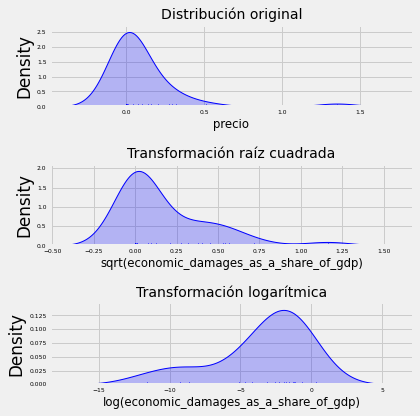

In [53]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sb.distplot(
    pak_df.economic_damages_as_a_share_of_gdp,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sb.distplot(
    np.sqrt(pak_df.economic_damages_as_a_share_of_gdp),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(economic_damages_as_a_share_of_gdp)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sb.distplot(
    np.log(pak_df.economic_damages_as_a_share_of_gdp),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(economic_damages_as_a_share_of_gdp)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

La variable "economic_damages_as_a_share_of_gdp" tiene una distribución asimétrica con una cola positiva, sesgo a la derecha. A este tipo de distribución suele visualizarse mejor tras aplicar el logarítmica o la raíz cuadrada.

In [54]:
from fitter import Fitter
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic', 'lognorm']

fitter = Fitter(pak_df.economic_damages_as_a_share_of_gdp, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,877.287374,2388.244345,122.236823,inf,0.562197,2.300506e-10
gamma,1408.634965,260.069635,134.367195,inf,0.539579,1.610246e-09
exponpow,1459.716662,363.973920,135.542695,inf,0.484838,1.148518e-07
expon,1659.460292,823.961040,136.278440,inf,0.574076,7.908193e-11
powerlaw,1675.701663,148.984239,140.096353,inf,0.546871,8.704507e-10
lognorm,1729.517739,594.406297,141.139503,inf,0.484847,1.147777e-07
chi2,1799.125635,193.154922,142.441623,inf,0.573842,8.079408e-11
logistic,2047.660630,943.553570,143.215223,inf,0.347238,4.642936e-04
norm,2131.994941,664.925964,144.547108,inf,0.335758,8.060702e-04
cauchy,2270.166164,2273.860681,146.619340,inf,0.487300,9.601146e-08


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Correlation analysis:

In [55]:
# Resume table
pak_df.corr ()

,annual_co2_emissions_tons,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,total_count_disasters,population_population_total,temperature_change_temp_change_celsius
annual_co2_emissions_tons,1.000000,0.082233,0.069350,0.021686,0.481603,0.967943,0.595437
economic_damages_as_a_share_of_gdp,0.082233,1.000000,0.598351,0.680708,0.023926,0.145934,0.141311
people_affected_per_100k,0.069350,0.598351,1.000000,0.436827,0.018974,0.178761,-0.089378
number_of_deaths,0.021686,0.680708,0.436827,1.000000,0.249351,0.082309,-0.069305
total_count_disasters,0.481603,0.023926,0.018974,0.249351,1.000000,0.466609,0.268266
population_population_total,0.967943,0.145934,0.178761,0.082309,0.466609,1.000000,0.581714
temperature_change_temp_change_celsius,0.595437,0.141311,-0.089378,-0.069305,0.268266,0.581714,1.000000


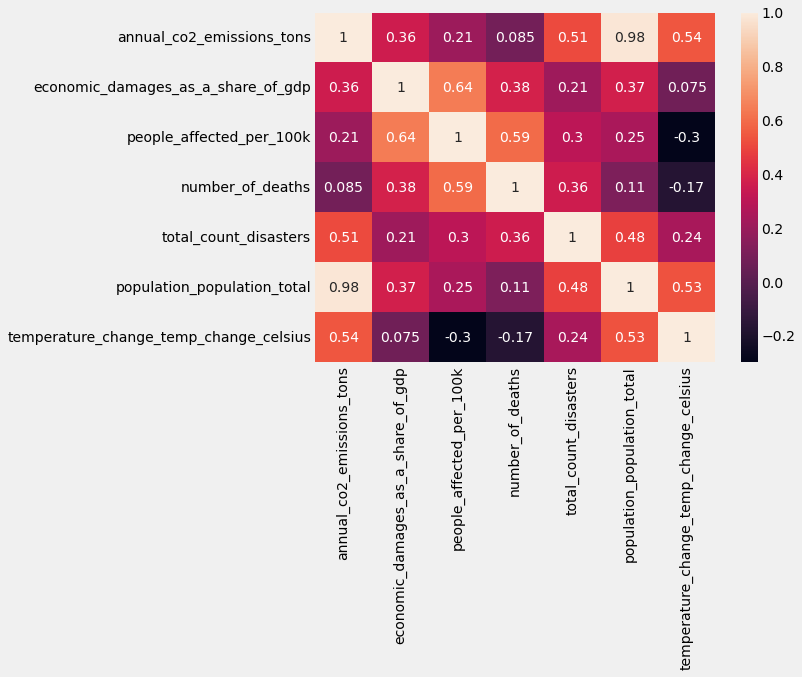

In [56]:
# Heatmap For Correlation Matrix
pak_corr_df = pak_df.corr(method='spearman')
plt.figure(figsize=(8, 6))
sb.heatmap(pak_corr_df, annot=True)
plt.show()

### One to one correlation test:

El análisis gráfico hecho previamente y los test estadísticos mostraron evidencias de que no se puede asumir normalidad en las variables de desastres. Siendo estrictos, este hecho excluye la posibilidad de utilizar el coeficiente de Pearson, dejando como alternativas el de Spearman o Kendall. Sin embargo, dado que la distribución no se aleja mucho de la normalidad y de que el coeficiente de Pearson tiene cierta robustez, a fines prácticos sí que se podría utilizar siempre y cuando se tenga en cuenta este hecho y se comunique en los resultados. Otra posibilidad es tratar de transformar las variables para mejorar su distribución, por ejemplo, aplicando el logaritmo.

#### - Annual CO2 Emissions	vs Population

In [57]:
# Calculation of correlation and significance with Scipy
# ==============================================================================
r, p = stats.pearsonr(pak_df['annual_co2_emissions_tons'], pak_df['population_population_total'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(pak_df['annual_co2_emissions_tons'], pak_df['population_population_total'], nan_policy='omit')
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(pak_df['annual_co2_emissions_tons'], pak_df['population_population_total'], nan_policy='omit')
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=0.9679430195837823, p-value=3.672993994248008e-20
Correlación Spearman: r=0.9799465240641712, p-value=2.7738367618405164e-23
Correlación Pearson: r=0.9090909090909091, p-value=7.2330801878161085e-22


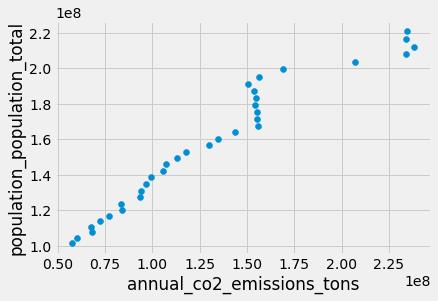

In [58]:
plt.scatter(pak_df.annual_co2_emissions_tons , pak_df.population_population_total )
plt.xlabel('annual_co2_emissions_tons')
plt.ylabel('population_population_total')
plt.show()

#### - Temperature Anomalies vs Annual CO2 Emissions 

In [59]:
# Calculation of correlation and significance with Scipy
# ==============================================================================
r, p = stats.pearsonr(pak_df['temperature_change_temp_change_celsius'], pak_df['annual_co2_emissions_tons'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(pak_df['temperature_change_temp_change_celsius'], pak_df['annual_co2_emissions_tons'], nan_policy='omit')
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(pak_df['temperature_change_temp_change_celsius'], pak_df['annual_co2_emissions_tons'], nan_policy='omit')
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=0.595436834545329, p-value=0.00025668523027856546
Correlación Spearman: r=0.5391042780748664, p-value=0.0012070732700337496
Correlación Pearson: r=0.4090909090909091, p-value=0.0006420255488966


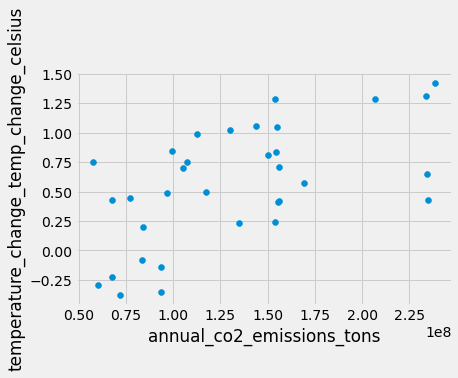

In [60]:
plt.scatter(pak_df.annual_co2_emissions_tons , pak_df.temperature_change_temp_change_celsius )
plt.xlabel('annual_co2_emissions_tons')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

#### - Total Disasters vs Temperature Anomalies

In [61]:
# Calculation of correlation and significance with Scipy
# ==============================================================================
r, p = stats.pearsonr(pak_df['total_count_disasters'], pak_df['temperature_change_temp_change_celsius'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(pak_df['total_count_disasters'], pak_df['temperature_change_temp_change_celsius'], nan_policy='omit')
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(pak_df['total_count_disasters'], pak_df['temperature_change_temp_change_celsius'], nan_policy='omit')
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=0.2682661232699808, p-value=0.13117764553834962
Correlación Spearman: r=0.24276907934491665, p-value=0.17342035697763516
Correlación Pearson: r=0.17973712244967777, p-value=0.16441964984756985


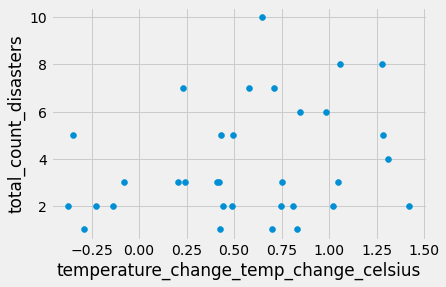

In [62]:
plt.scatter(pak_df.temperature_change_temp_change_celsius , pak_df.total_count_disasters )
plt.xlabel('temperature_change_temp_change_celsius')
plt.ylabel('total_count_disasters')
plt.show()

#### - People Affected per 100k vs Total Disasters

In [63]:
# Calculation of correlation and significance with Scipy
# ==============================================================================
r, p = stats.pearsonr(pak_df['total_count_disasters'], pak_df['people_affected_per_100k'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(pak_df['total_count_disasters'], pak_df['people_affected_per_100k'], nan_policy='omit')
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(pak_df['total_count_disasters'], pak_df['people_affected_per_100k'], nan_policy='omit')
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=0.01897370060240872, p-value=0.9165327792796244
Correlación Spearman: r=0.3004310917190395, p-value=0.08935737410272991
Correlación Pearson: r=0.21964395554939406, p-value=0.09291924541315182


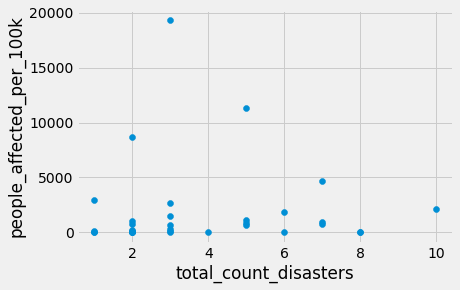

In [64]:
plt.scatter(pak_df.total_count_disasters , pak_df.people_affected_per_100k)
plt.xlabel('total_count_disasters')
plt.ylabel('people_affected_per_100k')
plt.show()

#### - Number of Deaths vs People Affected per 100k

In [65]:
# Calculation of correlation and significance with Scipy
# ==============================================================================
r, p = stats.pearsonr(pak_df['number_of_deaths'], pak_df['people_affected_per_100k'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(pak_df['number_of_deaths'], pak_df['people_affected_per_100k'], nan_policy='omit')
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(pak_df['number_of_deaths'], pak_df['people_affected_per_100k'], nan_policy='omit')
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=0.436826793340625, p-value=0.011029687980853303
Correlación Spearman: r=0.5939856271103641, p-value=0.0002680968741369966
Correlación Pearson: r=0.42463582365111807, p-value=0.000590433763487899


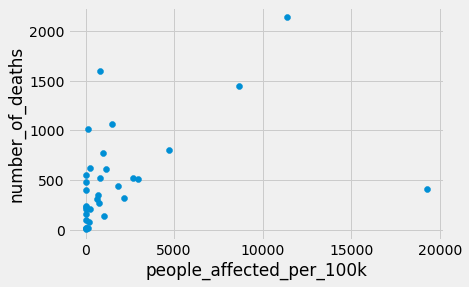

In [66]:
plt.scatter(pak_df.people_affected_per_100k, pak_df.number_of_deaths )
plt.xlabel( 'people_affected_per_100k')
plt.ylabel('number_of_deaths')
plt.show()

#### - Number of Deaths vs Economic Damages as a share of GDP

In [67]:
# Calculation of correlation and significance with Scipy
# ==============================================================================
r, p = stats.pearsonr(pak_df['number_of_deaths'], pak_df['economic_damages_as_a_share_of_gdp'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(pak_df['number_of_deaths'], pak_df['economic_damages_as_a_share_of_gdp'], nan_policy='omit')
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(pak_df['number_of_deaths'], pak_df['economic_damages_as_a_share_of_gdp'], nan_policy='omit')
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=0.6807077079198363, p-value=1.305246328690004e-05
Correlación Spearman: r=0.3837586162512311, p-value=0.027474251985016265
Correlación Pearson: r=0.31456167808030333, p-value=0.015980568803213697


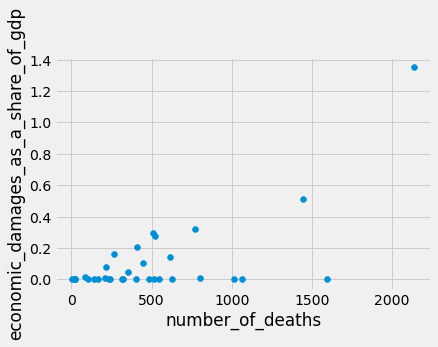

In [68]:
plt.scatter(pak_df.number_of_deaths, pak_df.economic_damages_as_a_share_of_gdp )
plt.xlabel('number_of_deaths')
plt.ylabel('economic_damages_as_a_share_of_gdp')
plt.show()

# Scaler the dataset

In [69]:
from sklearn.preprocessing import StandardScaler
 
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(pak_df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
 'population_population_total',
 'annual_co2_emissions_tons',
 'temperature_change_temp_change_celsius',
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths',
 'economic_damages_as_a_share_of_gdp'])
 
print("Scaled Dataset Using StandardScaler")
df_scaled.set_index(pak_df.index,inplace = True)
df_scaled.head()


Scaled Dataset Using StandardScaler


,population_population_total,annual_co2_emissions_tons,temperature_change_temp_change_celsius,total_count_disasters,people_affected_per_100k,number_of_deaths,economic_damages_as_a_share_of_gdp
year,,,,,,,
1988,-1.415663,-0.424069,-0.485865,-0.567536,-0.768095,-1.591872,0.390779
1989,-1.364156,-0.424069,-0.451224,-1.011563,-1.190548,-1.504119,-1.727250
1990,-1.221362,-0.424069,-0.485865,-1.015751,-1.190548,-1.416035,-0.265626
1991,-1.228021,-0.424069,-0.485865,0.092220,-0.768095,-1.328072,-1.594746
1992,-1.141749,1.610000,1.721218,1.975143,-0.768095,-1.240060,-1.898487


In [70]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 1988 to 2020
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   population_population_total             33 non-null     float64
 1   annual_co2_emissions_tons               33 non-null     float64
 2   temperature_change_temp_change_celsius  33 non-null     float64
 3   total_count_disasters                   33 non-null     float64
 4   people_affected_per_100k                33 non-null     float64
 5   number_of_deaths                        33 non-null     float64
 6   economic_damages_as_a_share_of_gdp      33 non-null     float64
dtypes: float64(7)
memory usage: 2.1 KB


<Figure size 720x1080 with 0 Axes>

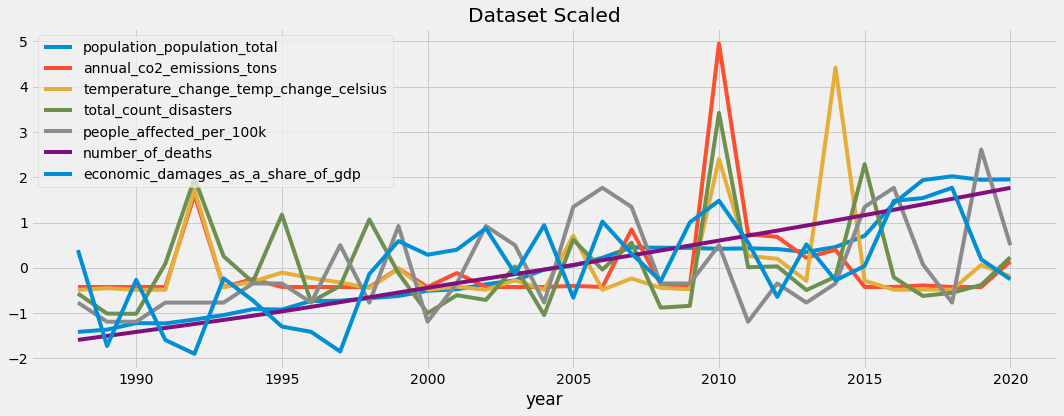

In [71]:
plt.figure(figsize=(10,15))
df_scaled.plot.line()
plt.gcf().set_size_inches(15, 6)
x=['year']

plt.title("Dataset Scaled");
plt.tight_layout() 

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

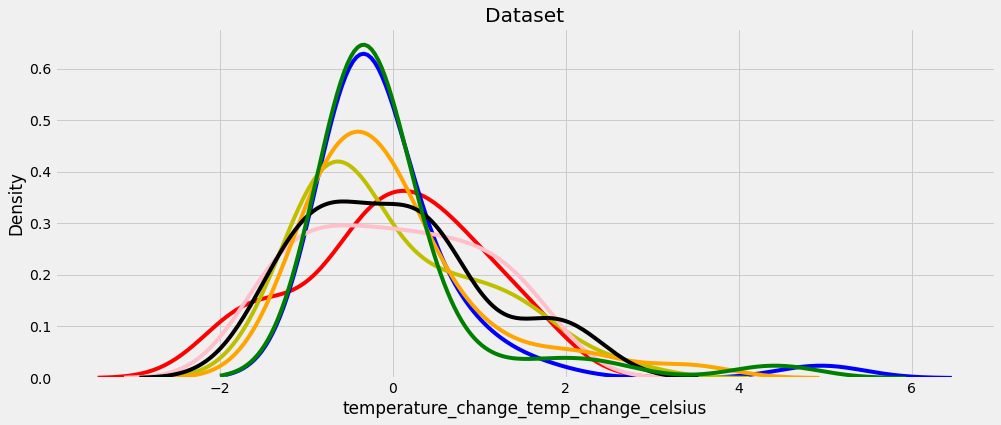

In [72]:
# Density plot for all variables

plt.figure(figsize=(5, 7))

ax = sb.distplot(df_scaled['economic_damages_as_a_share_of_gdp'], hist=False, color="r", label="economic_damages_as_a_share_of_gdp")
sb.distplot(df_scaled['annual_co2_emissions_tons'], hist=False, color="b", label="annual_co2_emissions_tons" , ax=ax)
sb.distplot(df_scaled['people_affected_per_100k'], hist=False, color="y", label="people_affected_per_100k" , ax=ax)
sb.distplot(df_scaled['number_of_deaths'], hist=False, color="pink", label="number_of_deaths" , ax=ax)
sb.distplot(df_scaled['total_count_disasters'], hist=False, color="orange", label="total_count_disasters" , ax=ax)
sb.distplot(df_scaled['population_population_total'], hist=False, color="black", label="population_population_total" , ax=ax)
sb.distplot(df_scaled['temperature_change_temp_change_celsius'], hist=False, color="green", label="temperature_change_temp_change_celsius" , ax=ax)
plt.title('Dataset')
plt.gcf().set_size_inches(15, 6)

plt.show()
plt.close()

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------


# Regular and Robust regression models

### Linear regression on a dataset with outliers

In [73]:
df_scaled.head()

,population_population_total,annual_co2_emissions_tons,temperature_change_temp_change_celsius,total_count_disasters,people_affected_per_100k,number_of_deaths,economic_damages_as_a_share_of_gdp
year,,,,,,,
1988,-1.415663,-0.424069,-0.485865,-0.567536,-0.768095,-1.591872,0.390779
1989,-1.364156,-0.424069,-0.451224,-1.011563,-1.190548,-1.504119,-1.727250
1990,-1.221362,-0.424069,-0.485865,-1.015751,-1.190548,-1.416035,-0.265626
1991,-1.228021,-0.424069,-0.485865,0.092220,-0.768095,-1.328072,-1.594746
1992,-1.141749,1.610000,1.721218,1.975143,-0.768095,-1.240060,-1.898487


In [74]:
# linear regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['population_population_total',
 'annual_co2_emissions_tons',
 'temperature_change_temp_change_celsius',
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# summarize shape
print(X.shape, y.shape)

(33, 6) (33,)


In [75]:
# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)


# Set independent and dependent variables
X = df_scaled[['population_population_total',
 'annual_co2_emissions_tons',
 'temperature_change_temp_change_celsius',
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# define the model
model = LinearRegression()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))

# Calculating the parameters using the least square method
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(f'The parameters of the line: {theta}')

# Now, calculating the y-axis values against x-values according to
# the parameters theta0 and theta1
y_line = X.dot(theta)


Mean MAE: 0.904 (0.415)
The parameters of the line: [ 0.09802883  0.46377262 -0.32744907 -0.30073634  0.07250581  0.46860398]


### Huber regression on a dataset with outliers - Robust model-
La regresión de Huber es un tipo de regresión robusta que es consciente de la posibilidad de valores atípicos en un conjunto de datos y les asigna menos peso que otros ejemplos en el conjunto de datos.

Podemos usar la regresión de Huber a través de la clase HuberRegressor en scikit-learn. El argumento " épsilon " controla lo que se considera un valor atípico, donde los valores más pequeños consideran más valores atípicos de los datos y, a su vez, hacen que el modelo sea más robusto para los valores atípicos. El valor predeterminado es 1,35.

In [76]:
# huber regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['population_population_total',
 'annual_co2_emissions_tons',
 'temperature_change_temp_change_celsius',
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths']]

# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)
 
# load dataset
X = df_scaled[['population_population_total',
 'annual_co2_emissions_tons',
 'temperature_change_temp_change_celsius',
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# define the model
model = HuberRegressor()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))


Mean MAE: 0.927 (0.433)


### Regresión RANSAC

Random Sample Consensus , o RANSAC para abreviar, es otro algoritmo de regresión robusto.

RANSAC intenta separar los datos en valores atípicos e internos y ajusta el modelo en los valores internos.

La biblioteca scikit-learn proporciona una implementación a través de la clase RANSACRegressor .

In [77]:
# ransac regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['population_population_total',
 'annual_co2_emissions_tons',
 'temperature_change_temp_change_celsius',
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
 
# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)
evaluate_model(X, y, model).any()
 
# load dataset
X = df_scaled[['population_population_total',
 'annual_co2_emissions_tons',
 'temperature_change_temp_change_celsius',
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# define the model
model = RANSACRegressor()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))


Mean MAE: 1.562 (1.119)


### Regresión de Theil Sen
La regresión de Theil Sen implica ajustar modelos de regresión múltiple en subconjuntos de los datos de entrenamiento y combinar los coeficientes al final.

El scikit-learn proporciona una implementación a través de la clase TheilSenRegressor .

In [78]:
# theilsen regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import TheilSenRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['population_population_total',
 'annual_co2_emissions_tons',
 'temperature_change_temp_change_celsius',
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

print(X.shape)
print(y.shape)

# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)
 
# load dataset
# Set independent and dependent variables
X = df_scaled[['population_population_total',
 'annual_co2_emissions_tons',
 'temperature_change_temp_change_celsius',
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# define the model
model = TheilSenRegressor()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))


(33, 6)
(33,)
Mean MAE: 1.083 (0.709)


### Comparison of Linear Regression Models

>Linear 0.904 (0.415)
>Huber 0.927 (0.433)
>RANSAC 1.572 (1.638)
>TheilSen 1.087 (0.718)


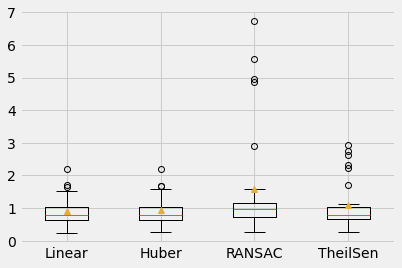

In [79]:

# compare robust regression algorithms on a regression dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from matplotlib import pyplot
 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['population_population_total',
 'annual_co2_emissions_tons',
 'temperature_change_temp_change_celsius',
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
 
# dictionary of model names and model objects
def get_models():
    models = dict()
    models['Linear'] = LinearRegression()
    models['Huber'] = HuberRegressor()
    models['RANSAC'] = RANSACRegressor()
    models['TheilSen'] = TheilSenRegressor()
    return models
 
# evaluate a model
def evalute_model(X, y, model, name):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    scores = absolute(scores)
    return scores
 
# load the dataset
# Set independent and dependent variables
X = df_scaled[['population_population_total',
 'annual_co2_emissions_tons',
 'temperature_change_temp_change_celsius',
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# retrieve models
models = get_models()
results = dict()
for name, model in models.items():
    # evaluate the model
    results[name] = evalute_model(X, y, model, name)
    # summarize progress
    print('>%s %.3f (%.3f)' % (name, mean(results[name]), std(results[name])))
# plot model performance for comparison
pyplot.boxplot(results.values(), labels=results.keys(), showmeans=True)
pyplot.show()

### Training and testing the Linear Regression Model

In [80]:
df_scaled.set_index(pak_df.index,inplace = True)
df_scaled.head()

,population_population_total,annual_co2_emissions_tons,temperature_change_temp_change_celsius,total_count_disasters,people_affected_per_100k,number_of_deaths,economic_damages_as_a_share_of_gdp
year,,,,,,,
1988,-1.415663,-0.424069,-0.485865,-0.567536,-0.768095,-1.591872,0.390779
1989,-1.364156,-0.424069,-0.451224,-1.011563,-1.190548,-1.504119,-1.727250
1990,-1.221362,-0.424069,-0.485865,-1.015751,-1.190548,-1.416035,-0.265626
1991,-1.228021,-0.424069,-0.485865,0.092220,-0.768095,-1.328072,-1.594746
1992,-1.141749,1.610000,1.721218,1.975143,-0.768095,-1.240060,-1.898487


In [81]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 3)
tss

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)

In [82]:
# Set independent and dependent variables
X = df_scaled[['population_population_total',
 'annual_co2_emissions_tons',
 'temperature_change_temp_change_celsius',
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

In [83]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [84]:
X_train.index

Int64Index([1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
            1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
            2010, 2011, 2012],
           dtype='int64', name='year')

In [85]:
X_test.index

Int64Index([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype='int64', name='year')

In [86]:
# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
#Entreno el modelo
model = regr.fit(X_train, y_train)

In [87]:
#Realizo una predicción
Y_pred_multiple = regr.predict(X_test)

In [88]:
df_LRpred=pd.DataFrame({'Actual':y_test, 'Fitted':Y_pred_multiple})
df_LRpred.head()

,Actual,Fitted
year,,
2013,0.517168,0.949245
2014,-0.277857,-3.872248
2015,0.040153,0.547814
2016,1.477314,1.027073
2017,1.540509,0.637669


<Figure size 720x1080 with 0 Axes>

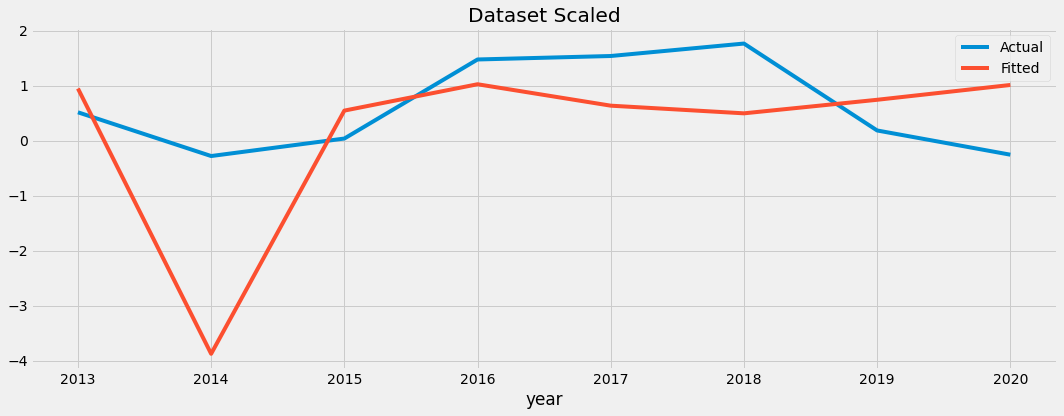

In [89]:
plt.figure(figsize=(10,15))
df_LRpred.plot.line()
plt.gcf().set_size_inches(15, 6)
x=['year']

plt.title("Dataset Scaled");
plt.tight_layout()

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


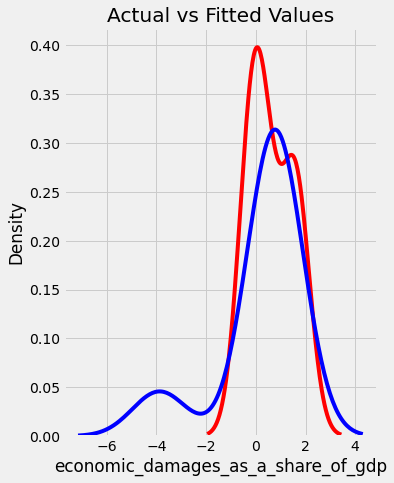

In [90]:
plt.figure(figsize=(5, 7))

ax = sb.distplot(y_test, hist=False, color="r", label="Actual Value")
sb.distplot(Y_pred_multiple, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values')

plt.show()
plt.close()

In [91]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
print('Valor de las pendientes o coeficientes "a":')
print(regr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(regr.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Valor de las pendientes o coeficientes "a":
[-0.41279056  0.76995578 -1.07450111 -0.14663807  0.21435654  0.87039918]
Valor de la intersección o coeficiente "b":
-0.10458158724387018


In [92]:
print('Precisión del modelo:')
print(regr.score(X_train, y_train))

Precisión del modelo:
0.49165686366329164


In [93]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                                    OLS Regression Results                                    
Dep. Variable:     economic_damages_as_a_share_of_gdp   R-squared:                       0.492
Model:                                            OLS   Adj. R-squared:                  0.322
Method:                                 Least Squares   F-statistic:                     2.902
Date:                                Sat, 03 Sep 2022   Prob (F-statistic):             0.0370
Time:                                        23:50:08   Log-Likelihood:                -26.442
No. Observations:                                  25   AIC:                             66.88
Df Residuals:                                      18   BIC:                             75.42
Df Model:                                           6                                         
Covariance Type:                            nonrobust                                         
                                             coef 

In [94]:
print(modelo.pvalues)

const                                     0.673246
population_population_total               0.810302
annual_co2_emissions_tons                 0.039471
temperature_change_temp_change_celsius    0.081004
total_count_disasters                     0.651980
people_affected_per_100k                  0.373936
number_of_deaths                          0.553647
dtype: float64


In [95]:
print('R2 score:', modelo.rsquared)

R2 score: 0.49165686366329164


In [96]:
print('F-statistic:', modelo.fvalue)
print('Probability of observing value at least as high as F-statistic:', modelo.f_pvalue)

F-statistic: 2.9015255357218144
Probability of observing value at least as high as F-statistic: 0.036954695600524334


In [97]:
df_scaled['residual'] = modelo.resid

In [98]:
Y_pred = modelo.predict(X_train)

In [99]:
df_scaled['predictions'] = modelo.predict(X_train)

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

### Assumption Testing

#### Linearity:
This assumes that there is a linear relationship between the independent variables and the dependent variable. In our case since we have multiple independent variables, we can do this by using a scatter plot to see our predicted values versus the actual values.

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


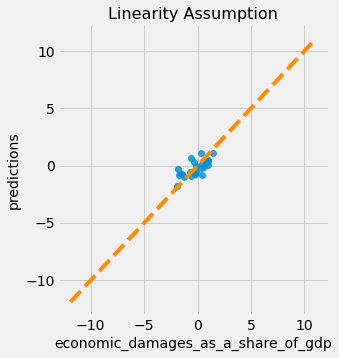

In [100]:
# Plotting the observed vs predicted values
sb.lmplot(x='economic_damages_as_a_share_of_gdp', y='predictions', data=df_scaled, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(df_scaled[['economic_damages_as_a_share_of_gdp', 'predictions']].min().min()-10, 
                        df_scaled[['economic_damages_as_a_share_of_gdp', 'predictions']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('predictions', fontsize=14)
plt.xlabel('economic_damages_as_a_share_of_gdp', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

The scatter plots show residual point are spread around the diagonal line, so we can assume that there is linear relationship between our independent and dependent variables.

#### Normality:
This assumes that the error terms of the model are normally distributed. We will examine the normality of the residuals by plotting it into histogram and looking at the p-value from the Anderson-Darling test for normality. 

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.0


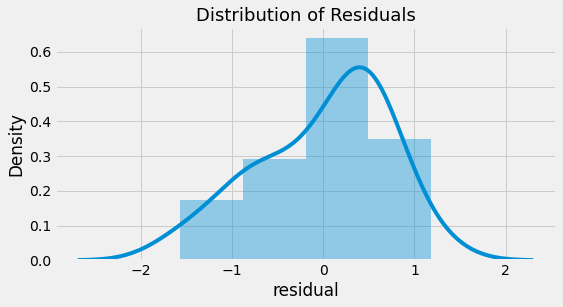

Residuals are not normally distributed


In [101]:
from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(df_scaled['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sb.distplot(df_scaled['residual'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

#### Multicollinearity:
This assumes that the predictors used in the regression are not correlated with each other. To identify if there are any correlation between our predictors we can calculate the Pearson correlation coefficient between each column in our data

Pearson correlation coefficient matrix of each variables:
                                         annual_co2_emissions_tons  \
annual_co2_emissions_tons                                1.000000   
people_affected_per_100k                                 0.023926   
number_of_deaths                                         0.145934   
total_count_disasters                                    0.680708   
population_population_total                              0.082233   
temperature_change_temp_change_celsius                   0.598351   

                                        people_affected_per_100k  \
annual_co2_emissions_tons                               0.023926   
people_affected_per_100k                                1.000000   
number_of_deaths                                        0.466609   
total_count_disasters                                   0.249351   
population_population_total                             0.481603   
temperature_change_temp_change_celsius           

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


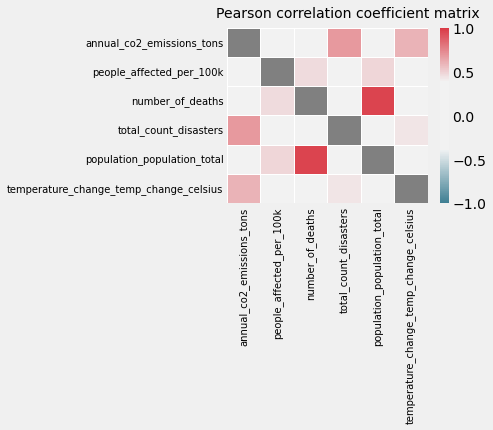

In [102]:
corr = df_scaled[['annual_co2_emissions_tons',
 'people_affected_per_100k',
 'number_of_deaths',
 'total_count_disasters',
 'population_population_total',
 'temperature_change_temp_change_celsius']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
# fig.tight_layout()

#### Autocorrelation
Autocorrelation is correlation of the errors (residuals) over time. Used when data are collected over time to detect if autocorrelation is present. Autocorrelation exists if residuals in one time period are related to residuals in another period. We can detect autocorrelation by performing Durbin-Watson test to determine if either positive or negative correlation is present. In this step we will use the durbin_watson () function from statsmodel to calculate our Durbin-Watson score and then assess the value with the following condition:

If the Durbin-Watson score is less than 1.5 then there is a positive autocorrelation and the assumption is not satisfied


If the Durbin-Watson score is between 1.5 and 2.5 then there is no autocorrelation and the assumption is satisfied


If the Durbin-Watson score is more than 2.5 then there is a negative autocorrelation and the assumption is not satisfied

In [103]:
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(df_scaled['residual'])

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: nan
Little to no autocorrelation 

Assumption satisfied


#### Homoscedasticity
This assumes homoscedasticity, which is the same variance within our error terms. Heteroscedasticity, the violation of homoscedasticity, occurs when we don’t have an even variance across the error terms. To detect homoscedasticity, we can plot our residual and see if the variance appears to be uniform.

In [104]:
df_scaled.head()

,population_population_total,annual_co2_emissions_tons,temperature_change_temp_change_celsius,total_count_disasters,people_affected_per_100k,number_of_deaths,economic_damages_as_a_share_of_gdp,residual,predictions
year,,,,,,,,,
1988,-1.415663,-0.424069,-0.485865,-0.567536,-0.768095,-1.591872,0.390779,1.182429,-0.791650
1989,-1.364156,-0.424069,-0.451224,-1.011563,-1.190548,-1.504119,-1.727250,-0.928053,-0.799197
1990,-1.221362,-0.424069,-0.485865,-1.015751,-1.190548,-1.416035,-0.265626,0.478010,-0.743637
1991,-1.228021,-0.424069,-0.485865,0.092220,-0.768095,-1.328072,-1.594746,-0.858506,-0.736240
1992,-1.141749,1.610000,1.721218,1.975143,-0.768095,-1.240060,-1.898487,-0.121762,-1.776725


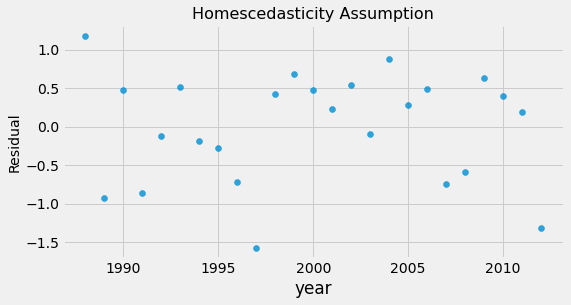

In [106]:
# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=df_scaled.index, y=df_scaled.residual, alpha=0.8)

plt.plot(np.repeat(0,len(df_scaled.index)+2), color='darkorange', linestyle='--')

plt.ylabel('Residual', fontsize=14)
plt.xlabel('year')
plt.title('Homescedasticity Assumption', fontsize=16)
plt.show()  

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

### Huber Model: selected by the MAE criteria

In [107]:
df_scaled.head()

,population_population_total,annual_co2_emissions_tons,temperature_change_temp_change_celsius,total_count_disasters,people_affected_per_100k,number_of_deaths,economic_damages_as_a_share_of_gdp,residual,predictions
year,,,,,,,,,
1988,-1.415663,-0.424069,-0.485865,-0.567536,-0.768095,-1.591872,0.390779,1.182429,-0.791650
1989,-1.364156,-0.424069,-0.451224,-1.011563,-1.190548,-1.504119,-1.727250,-0.928053,-0.799197
1990,-1.221362,-0.424069,-0.485865,-1.015751,-1.190548,-1.416035,-0.265626,0.478010,-0.743637
1991,-1.228021,-0.424069,-0.485865,0.092220,-0.768095,-1.328072,-1.594746,-0.858506,-0.736240
1992,-1.141749,1.610000,1.721218,1.975143,-0.768095,-1.240060,-1.898487,-0.121762,-1.776725


In [108]:
# huber regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['population_population_total',
 'annual_co2_emissions_tons',
 'temperature_change_temp_change_celsius',
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths']]

# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)
 
# load dataset
X = df_scaled[['population_population_total',
 'annual_co2_emissions_tons',
 'temperature_change_temp_change_celsius',
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# define the model
model = HuberRegressor()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))

for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

X_train.index


Mean MAE: 0.927 (0.433)


Int64Index([1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
            1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
            2010, 2011, 2012],
           dtype='int64', name='year')

In [109]:
X_test.index

Int64Index([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype='int64', name='year')

In [110]:
# define the model
model = HuberRegressor()

#Entreno el modelo
model_hu = model.fit(X_train, y_train)

#Realizo una predicción
y_pred = model_hu.predict(X_test)

# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))


Mean MAE: 0.927 (0.433)


In [111]:
def mape(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mape(y_test, y_pred.reshape(-1,1))

533.879445213368

In [112]:
df_HUpred=pd.DataFrame({'Actual':y_test, 'Fitted':y_pred})
df_HUpred.head()

,Actual,Fitted
year,,
2013,0.517168,1.571646
2014,-0.277857,-3.235949
2015,0.040153,0.952052
2016,1.477314,0.818637
2017,1.540509,-0.161994


<Figure size 720x1080 with 0 Axes>

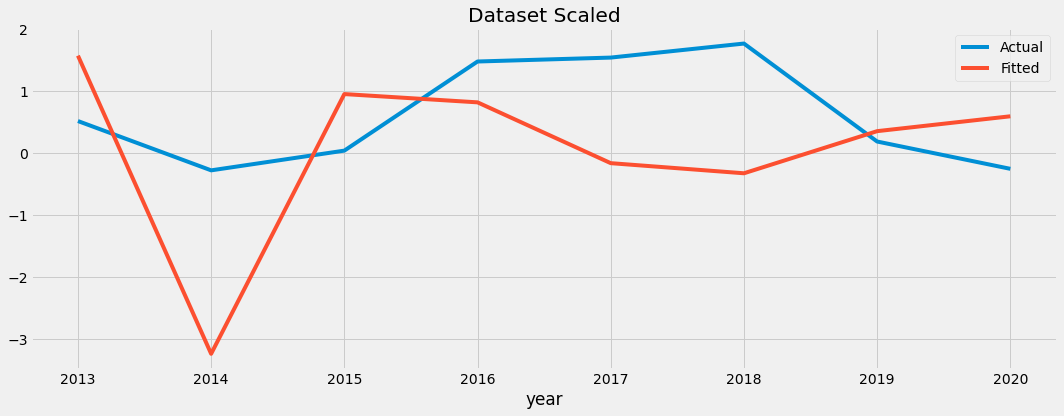

In [113]:
plt.figure(figsize=(10,15))
df_HUpred.plot.line()
plt.gcf().set_size_inches(15, 6)
x=['year']

plt.title("Dataset Scaled");
plt.tight_layout()

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


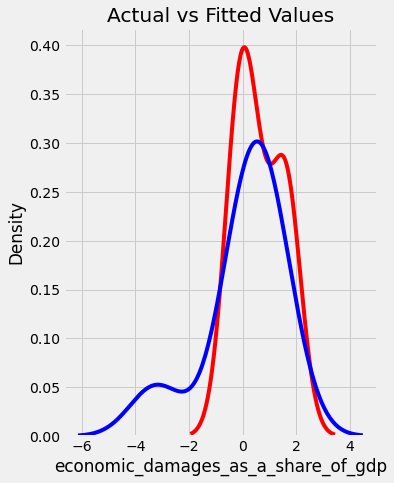

In [114]:
plt.figure(figsize=(5, 7))

ax = sb.distplot(y_test, hist=False, color="r", label="Actual Value")
sb.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values')

plt.show()
plt.close()

In [115]:
print('Intercept:', model_hu.intercept_)
print('Coefficients:', model_hu.coef_)

Intercept: -0.0690334019817234
Coefficients: [-1.66889226  0.78521948 -1.07196019 -0.19925283  0.27598174  1.98978515]


In [116]:
print('Precisión del modelo:')
print(model_hu.score(X_train, y_train))

Precisión del modelo:
0.46483657282442925


## Modelo DISCRETO: Random Forest 


In [117]:
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn import svm

In [118]:
pak_df.head()

,annual_co2_emissions_tons,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,total_count_disasters,population_population_total,temperature_change_temp_change_celsius
year,,,,,,,
1988,57607377,0.000000,0.000000,232.0,2.0,101389603,0.748
1989,60316616,0.000000,136.250993,20.0,1.0,104512874,-0.291
1990,67827369,0.000000,0.000000,18.0,1.0,107647918,0.426
1991,67477105,0.000000,0.000000,547.0,2.0,110778655,-0.226
1992,72014921,0.511526,8680.946528,1446.0,2.0,113911126,-0.375


In [119]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 2)
tss

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None)

In [120]:
# Set independent and dependent variables
X = pak_df[['population_population_total',
 'annual_co2_emissions_tons',
 'temperature_change_temp_change_celsius',
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths']]
y = pak_df['economic_damages_as_a_share_of_gdp']

In [121]:
feature_list = list(X.columns)
feature_list

['population_population_total',
 'annual_co2_emissions_tons',
 'temperature_change_temp_change_celsius',
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths']

In [122]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [123]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (22, 6)
y_train shape: (22,)
X_test shape: (11, 6)
y_test shape: (11,)


In [124]:
X_train.index

Int64Index([1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
            1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009],
           dtype='int64', name='year')

In [125]:
X_test.index

Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype='int64', name='year')

In [126]:
# The baseline predictions 
baseline_preds = y_test
print('Error promedio de línea base: ', round(np.mean(baseline_preds), 2))

Error promedio de línea base:  0.22


In [127]:
from sklearn.ensemble import RandomForestRegressor
# Crear una instancia del modelo con 1000 árboles de decisión 
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Entrenar el modelo con datos de entrenamiento 
rf.fit(X_train, y_train);

In [128]:
# Usar el método de predicción del bosque en las 
predictions= rf.predict(X_test)

In [129]:
print('Precisión del modelo:')
print(rf.score(X_train, y_train))

Precisión del modelo:
0.8563106857268388


In [130]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = mse**.5
print(mse)
print(rmse)

0.13763354388770366
0.3709899511950474


In [131]:
df_RFpred=pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df_RFpred.head()

,Actual,Predicted
year,,
2010,1.351840,0.256215
2011,0.292621,0.086604
2012,0.278540,0.067362
2013,0.162184,0.059773
2014,0.206457,0.259338


<Figure size 720x1080 with 0 Axes>

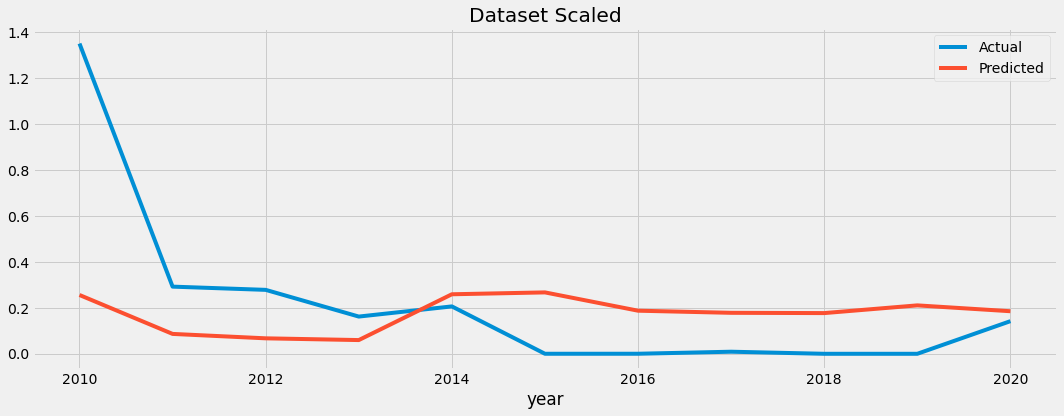

In [132]:
plt.figure(figsize=(10,15))
df_RFpred.plot.line()
plt.gcf().set_size_inches(15, 6)
x=['year']

plt.title("Dataset Scaled");
plt.tight_layout()

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


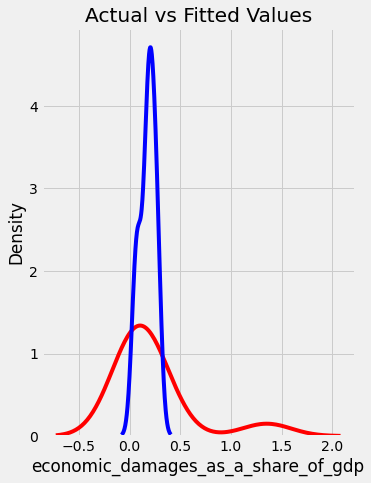

In [133]:
plt.figure(figsize=(5, 7))

ax = sb.distplot(y_test, hist=False, color="r", label="Actual Value")
sb.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values')

plt.show()
plt.close()

In [134]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.247650311092411
Mean Squared Error: 0.13763354388770366
Root Mean Squared Error: 0.3709899511950474


In [135]:
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.25 
Accuracy: -inf %.


In [136]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: annual_co2_emissions_tons Importance: 0.28
Variable: people_affected_per_100k Importance: 0.25
Variable: temperature_change_temp_change_celsius Importance: 0.2
Variable: number_of_deaths     Importance: 0.2
Variable: population_population_total Importance: 0.04
Variable: total_count_disasters Importance: 0.02


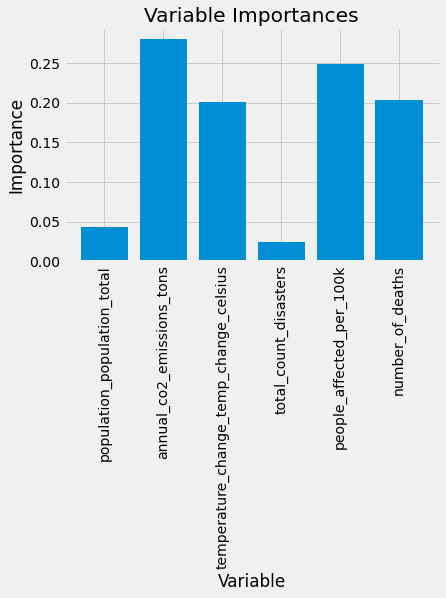

In [137]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


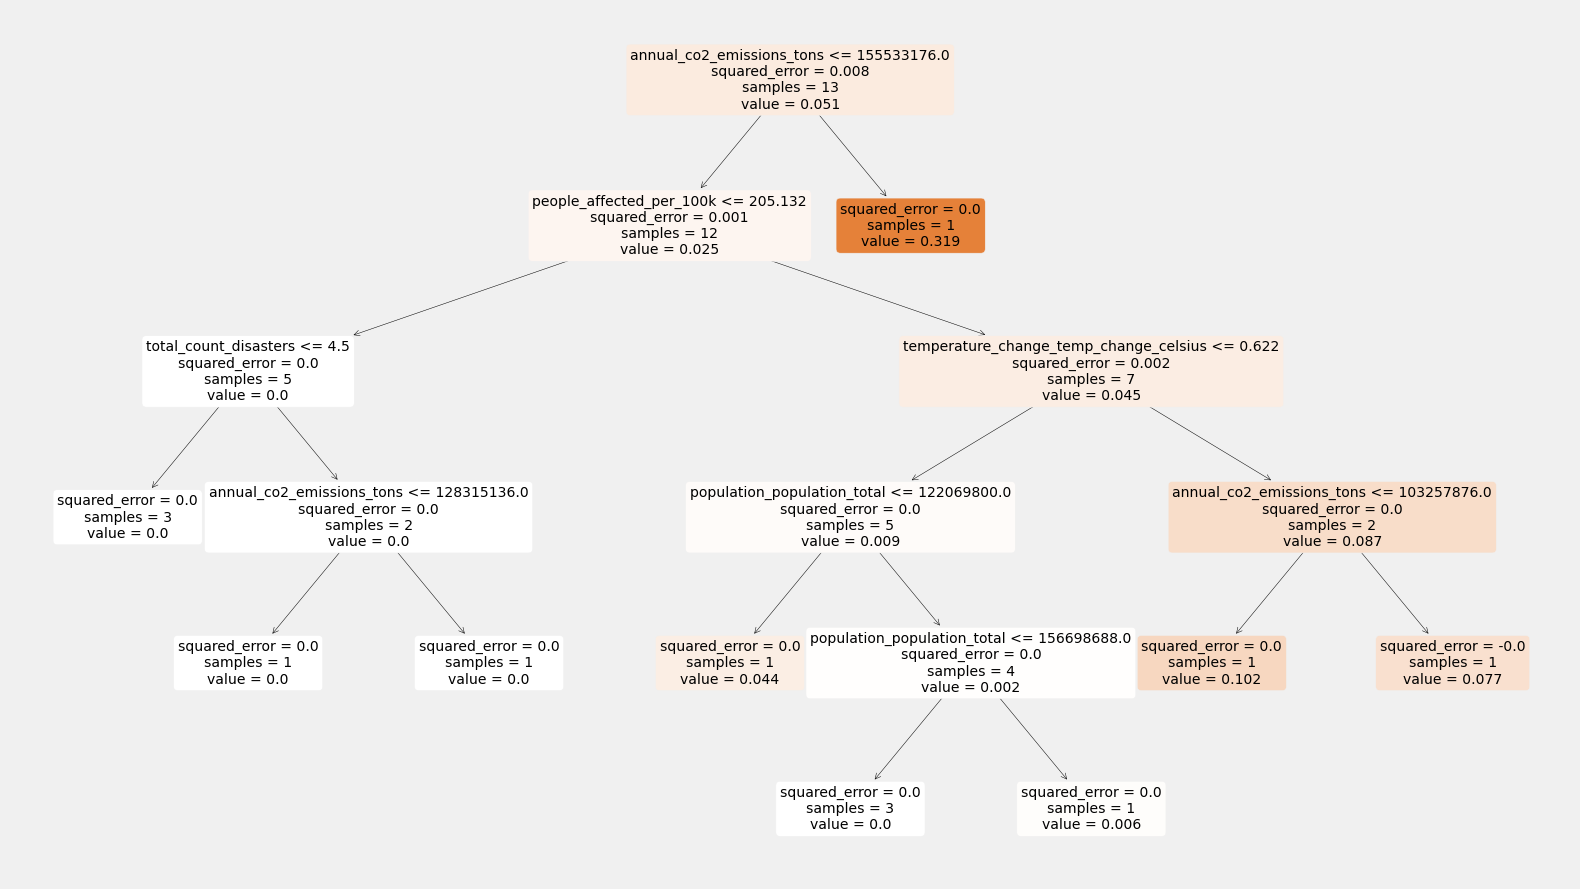

In [138]:
import pydot
# Pull out one tree from the forest
Tree = rf.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True,
              feature_names = feature_list,
              rounded=True, 
              fontsize=14);

In [139]:
# Grid de hiperparámetros evaluados
# ==============================================================================
from sklearn.model_selection import ParameterGrid

param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'max_features': [5],
                 'max_depth'   : [None, 3, 10, 20]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_r2': []}

for params in param_grid:
    
    modelo = RandomForestRegressor(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(X_train, y_train)
    
    resultados['params'].append(params)
    resultados['oob_r2'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(4)

Modelo: {'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 20, 'max_features': 5, 'n_estimators': 150} ✓


,oob_r2,max_depth,max_features,n_estimators
1,-0.158915,3.0,5.0,150.0
0,-0.162415,NaN,5.0,150.0
2,-0.162415,10.0,5.0,150.0
3,-0.162415,20.0,5.0,150.0


In [140]:
import multiprocessing
from sklearn.model_selection import GridSearchCV

#### Grid Search basado en validación cruzada


In [141]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [150],
              'max_features': [5],
              'max_depth'   : [None, 3, 10, 20]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestRegressor(random_state = 123),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
1,3,5,150,-0.104182,0.075800,-0.045540,0.014247
0,None,5,150,-0.104636,0.075364,-0.044487,0.013912
2,10,5,150,-0.104636,0.075364,-0.044487,0.013912
3,20,5,150,-0.104636,0.075364,-0.044487,0.013912


In [142]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'max_depth': 3, 'max_features': 5, 'n_estimators': 150} : -0.10418188969933712 neg_root_mean_squared_error


In [143]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo.predict(X = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.35897085001152856


In [144]:
from sklearn.inspection import permutation_importance
importancia = permutation_importance(
                estimator    = modelo_final,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
4,0.030667,0.001407,people_affected_per_100k
5,0.023866,0.001445,number_of_deaths
2,0.022397,0.001339,temperature_change_temp_change_celsius
1,0.021334,0.010397,annual_co2_emissions_tons
0,0.002844,0.001269,population_population_total
3,0.000883,0.000700,total_count_disasters


In [145]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 3, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('annual_co2_emissions_tons'),
                     feature_list.index('temperature_change_temp_change_celsius'),
                     feature_list.index('total_count_disasters'), 
                     feature_list.index('number_of_deaths')]

train_important = X_train.values[:,important_indices]
test_important = X_test.values[:,important_indices]
# Train the random forest
rf_most_important.fit(train_important, y_train)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - y_test)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), '')
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')



Mean Absolute Error: 0.31 
Accuracy: -inf %.


In [146]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.30863634712258753
Mean Squared Error: 0.164599480674933
Root Mean Squared Error: 0.40570861548028897


In [147]:
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.31 
Accuracy: -inf %.


In [148]:
# Error de test del modelo modificado
# ==============================================================================
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predictions,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.40570861548028897


In [149]:
df_RFpred_mod=pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df_RFpred_mod.head()

,Actual,Predicted
year,,
2010,1.351840,0.276988
2011,0.292621,0.106479
2012,0.278540,0.116573
2013,0.162184,0.132271
2014,0.206457,0.319438


<Figure size 720x1080 with 0 Axes>

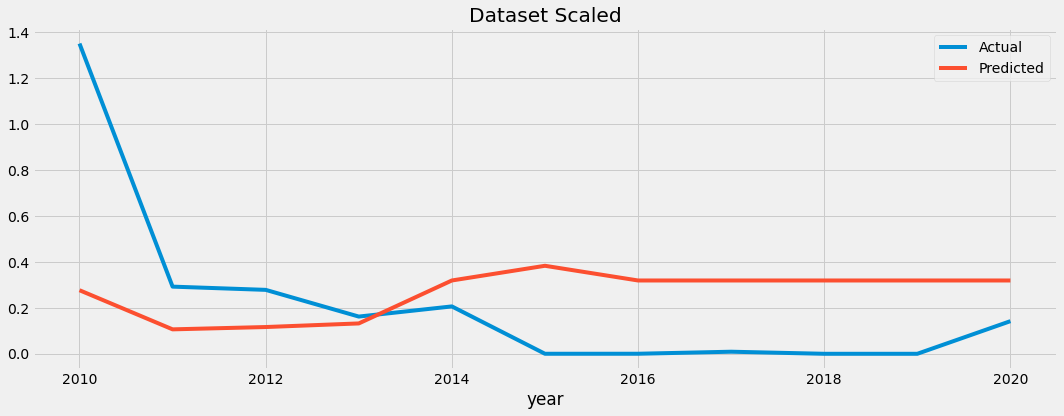

In [150]:
plt.figure(figsize=(10,15))
df_RFpred_mod.plot.line()
plt.gcf().set_size_inches(15, 6)
x=['year']

plt.title("Dataset Scaled");
plt.tight_layout() 

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


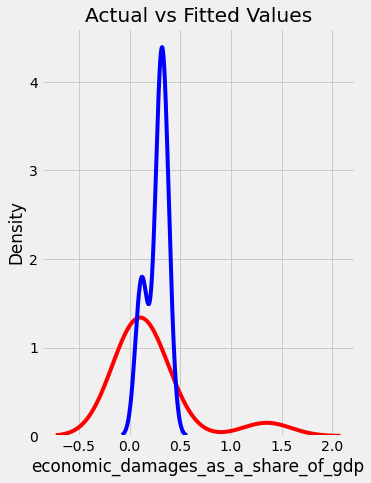

In [151]:
plt.figure(figsize=(5, 7))

ax = sb.distplot(y_test, hist=False, color="r", label="Actual Value")
sb.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values')

plt.show()
plt.close()

In [152]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from pydotplus import graph_from_dot_data
import pydot


[Text(0.625, 0.875, 'people_affected_per_100k <= 6687.0\nsquared_error = 0.0\nsamples = 13\nvalue = 0.1'),
 Text(0.5, 0.625, 'people_affected_per_100k <= 668.0\nsquared_error = 0.0\nsamples = 12\nvalue = 0.0'),
 Text(0.25, 0.375, 'population_population_total <= 167835808.0\nsquared_error = 0.0\nsamples = 9\nvalue = 0.0'),
 Text(0.125, 0.125, 'squared_error = 0.0\nsamples = 8\nvalue = 0.0'),
 Text(0.375, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 0.0'),
 Text(0.75, 0.375, 'population_population_total <= 122069800.0\nsquared_error = 0.0\nsamples = 3\nvalue = 0.0'),
 Text(0.625, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 0.0'),
 Text(0.875, 0.125, 'squared_error = 0.0\nsamples = 2\nvalue = 0.0'),
 Text(0.75, 0.625, 'squared_error = 0.0\nsamples = 1\nvalue = 0.5')]

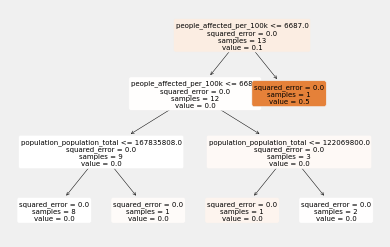

In [153]:
# Limit depth of tree to 3 levels
from sklearn import tree
rf_small = RandomForestRegressor(n_estimators=6, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
tree.plot_tree(tree_small, filled=True, feature_names = feature_list, rounded = True, precision = 1, fontsize=7)

In [154]:
# Limit depth of tree to 3 levels
from sklearn import tree
rf_small = RandomForestRegressor(n_estimators=6, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');


#### Tomando el modelo mas significativo y reduciendolo


In [155]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 2)
tss

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None)

In [156]:
# Set independent and dependent variables
X = df_scaled[['population_population_total',
 'annual_co2_emissions_tons',
 'temperature_change_temp_change_celsius',
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

In [157]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [158]:
# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
#Entreno el modelo
model = regr.fit(X_train, y_train)

In [159]:
#Realizo una predicción
Y_pred_multiple = regr.predict(X_test)

In [160]:
df_LRpred=pd.DataFrame({'Actual':y_test, 'Fitted':Y_pred_multiple})
df_LRpred.head()

,Actual,Fitted
year,,
2010,1.481392,0.935900
2011,0.559977,1.042761
2012,-0.640715,1.509632
2013,0.517168,2.196936
2014,-0.277857,-2.420358


<Figure size 720x1080 with 0 Axes>

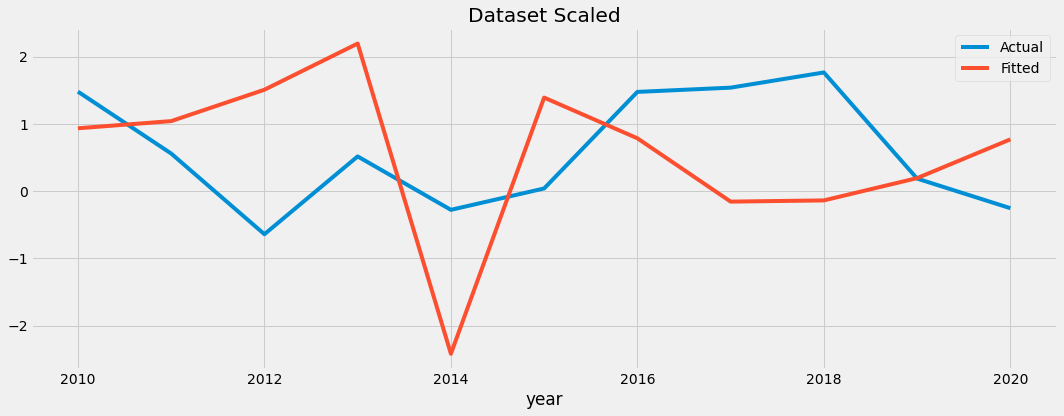

In [161]:
plt.figure(figsize=(10,15))
df_LRpred.plot.line()
plt.gcf().set_size_inches(15, 6)
x=['year']

plt.title("Dataset Scaled");
plt.tight_layout()

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


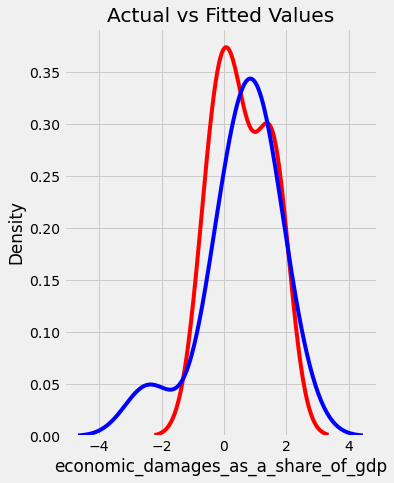

In [162]:
plt.figure(figsize=(5, 7))

ax = sb.distplot(y_test, hist=False, color="r", label="Actual Value")
sb.distplot(Y_pred_multiple, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values')

plt.show()
plt.close()

In [163]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                                    OLS Regression Results                                    
Dep. Variable:     economic_damages_as_a_share_of_gdp   R-squared:                       0.543
Model:                                            OLS   Adj. R-squared:                  0.360
Method:                                 Least Squares   F-statistic:                     2.967
Date:                                Sat, 03 Sep 2022   Prob (F-statistic):             0.0409
Time:                                        23:53:36   Log-Likelihood:                -21.616
No. Observations:                                  22   AIC:                             57.23
Df Residuals:                                      15   BIC:                             64.87
Df Model:                                           6                                         
Covariance Type:                            nonrobust                                         
                                             coef 

In [164]:
df_scaled['residual'] = modelo.resid

In [ ]:
df_scaled['predictions'] = modelo.predict(X_train)


Modelo Satelite


In [165]:
# Set independent and dependent variables
X = df_scaled[[
 'temperature_change_temp_change_celsius']]
y = df_scaled['total_count_disasters']

In [166]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [167]:
X_train.head()

,temperature_change_temp_change_celsius
year,
1988,-0.485865
1989,-0.451224
1990,-0.485865
1991,-0.485865
1992,1.721218


In [168]:
# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
#Entreno el modelo
model = regr.fit(X_train, y_train)

In [169]:
#Realizo una predicción
Y_pred_multiple = regr.predict(X_test)

In [170]:
df_LRpred=pd.DataFrame({'Actual':y_test, 'Fitted':Y_pred_multiple})
df_LRpred.head()

,Actual,Fitted
year,,
2010,3.420323,2.784285
2011,0.012630,0.394278
2012,0.031480,0.323158
2013,-0.492136,-0.220734
2014,-0.194722,5.043755


<Figure size 720x1080 with 0 Axes>

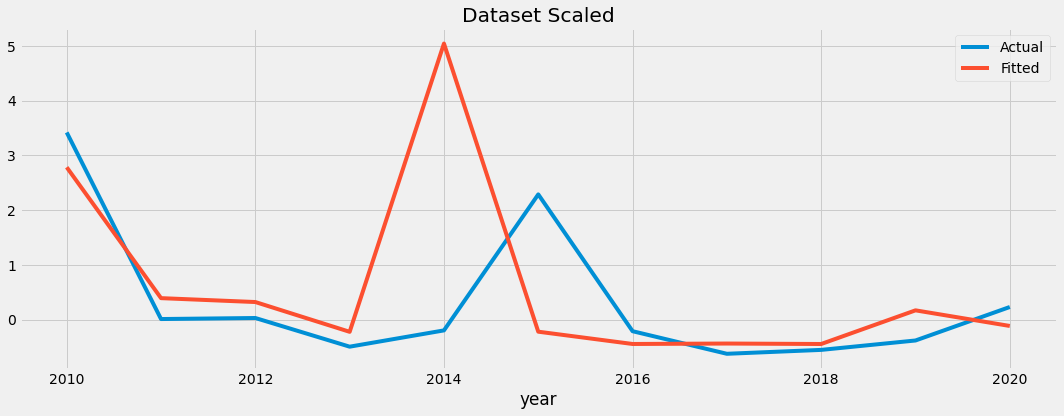

In [171]:
plt.figure(figsize=(10,15))
df_LRpred.plot.line()
plt.gcf().set_size_inches(15, 6)
x=['year']

plt.title("Dataset Scaled");
plt.tight_layout()

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


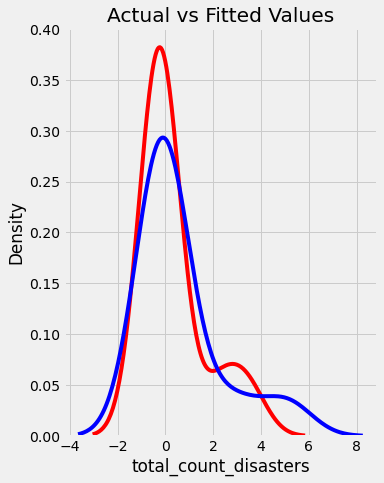

In [172]:
plt.figure(figsize=(5, 7))

ax = sb.distplot(y_test, hist=False, color="r", label="Actual Value")
sb.distplot(Y_pred_multiple, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values')

plt.show()
plt.close()

In [173]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                              OLS Regression Results                             
Dep. Variable:     total_count_disasters   R-squared:                       0.481
Model:                               OLS   Adj. R-squared:                  0.455
Method:                    Least Squares   F-statistic:                     18.57
Date:                   Sat, 03 Sep 2022   Prob (F-statistic):           0.000342
Time:                           23:54:05   Log-Likelihood:                -19.238
No. Observations:                     22   AIC:                             42.48
Df Residuals:                         20   BIC:                             44.66
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

ref. https://www.cienciadedatos.net/documentos/py08_random_forest_python.html

#### SUGGESTION: VAR

In [174]:
df_scaled.head()

,population_population_total,annual_co2_emissions_tons,temperature_change_temp_change_celsius,total_count_disasters,people_affected_per_100k,number_of_deaths,economic_damages_as_a_share_of_gdp,residual,predictions
year,,,,,,,,,
1988,-1.415663,-0.424069,-0.485865,-0.567536,-0.768095,-1.591872,0.390779,1.373987,-0.791650
1989,-1.364156,-0.424069,-0.451224,-1.011563,-1.190548,-1.504119,-1.727250,-0.857985,-0.799197
1990,-1.221362,-0.424069,-0.485865,-1.015751,-1.190548,-1.416035,-0.265626,0.646049,-0.743637
1991,-1.228021,-0.424069,-0.485865,0.092220,-0.768095,-1.328072,-1.594746,-0.803275,-0.736240
1992,-1.141749,1.610000,1.721218,1.975143,-0.768095,-1.240060,-1.898487,0.099222,-1.776725


In [175]:
df_scaled=df_scaled.drop(['residual', 'predictions'],axis=1)
df_scaled.head()

,population_population_total,annual_co2_emissions_tons,temperature_change_temp_change_celsius,total_count_disasters,people_affected_per_100k,number_of_deaths,economic_damages_as_a_share_of_gdp
year,,,,,,,
1988,-1.415663,-0.424069,-0.485865,-0.567536,-0.768095,-1.591872,0.390779
1989,-1.364156,-0.424069,-0.451224,-1.011563,-1.190548,-1.504119,-1.727250
1990,-1.221362,-0.424069,-0.485865,-1.015751,-1.190548,-1.416035,-0.265626
1991,-1.228021,-0.424069,-0.485865,0.092220,-0.768095,-1.328072,-1.594746
1992,-1.141749,1.610000,1.721218,1.975143,-0.768095,-1.240060,-1.898487


In [176]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 1988 to 2020
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   population_population_total             33 non-null     float64
 1   annual_co2_emissions_tons               33 non-null     float64
 2   temperature_change_temp_change_celsius  33 non-null     float64
 3   total_count_disasters                   33 non-null     float64
 4   people_affected_per_100k                33 non-null     float64
 5   number_of_deaths                        33 non-null     float64
 6   economic_damages_as_a_share_of_gdp      33 non-null     float64
dtypes: float64(7)
memory usage: 2.1 KB


In [177]:
X = df_scaled['total_count_disasters'].values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))


mean1=-0.119583, mean2=0.112548
variance1=0.709687, variance2=1.247109


Check Granger Causality of all possible combinations of the Time series.
The rows are the response variable, columns are predictors. The values in the table are the P-Values. 
P-Values lesser than the significance level (0.05), implies the Null Hypothesis that the coefficients of the corresponding past values is zero, that is, the X does not cause Y can be rejected.

In [178]:
variables = df_scaled.columns

In [179]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=2
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df_scaled = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df_scaled.columns:
        for r in df_scaled.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df_scaled.loc[r, c] = min_p_value
    df_scaled.columns = [var + '_x' for var in variables]
    df_scaled.index = [var + '_y' for var in variables]
    return df_scaled

grangers_causation_matrix(df_scaled, variables = df_scaled.columns)      

,population_population_total_x,annual_co2_emissions_tons_x,temperature_change_temp_change_celsius_x,total_count_disasters_x,people_affected_per_100k_x,number_of_deaths_x,economic_damages_as_a_share_of_gdp_x
population_population_total_y,1.0000,0.2824,0.0001,0.0376,0.0081,0.0008,0.5306
annual_co2_emissions_tons_y,0.2143,1.0000,0.4496,0.4236,0.7514,0.4958,0.3343
temperature_change_temp_change_celsius_y,0.0835,0.4588,1.0000,0.6907,0.1774,0.2352,0.4089
total_count_disasters_y,0.7820,0.6887,0.0226,1.0000,0.3402,0.6067,0.5179
people_affected_per_100k_y,0.0185,0.0757,0.4463,0.5579,1.0000,0.0140,0.1211
number_of_deaths_y,0.3862,0.2707,0.4213,0.1810,0.5765,1.0000,0.0010
economic_damages_as_a_share_of_gdp_y,0.0063,0.6241,0.5346,0.2255,0.0404,0.0015,1.0000


If a given p-value is < significance level (0.05), then, the corresponding X series (column) causes the Y (row).

For example, P-Value of 0.2824 at (row 1, column 2) represents the p-value of the Grangers Causality test for annual_co2_emissions_tons  causing population_population_total, which is greater that the significance level of 0.05.

So, you can't reject the null hypothesis and conclude annual_co2_emissions_tons causes population_population_total.

#### Stationarity Test:



In [180]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [181]:
X = df_scaled['total_count_disasters'].values
result = adfuller(X) 
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis")
    print("Reject the null hypothesis")
    print("Data has no unit root and is stationary")
else:
    print("Weak evidence against the null hypothesis")
    print("Fail to reject the null hypothesis")
    print("Data has a unit root and is non-stationary")


ADF Statistic: -2.942356
p-value: 0.040640
Critical Values:
	1%: -3.770
	5%: -3.005
	10%: -2.643
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [182]:
X = df_scaled['temperature_change_temp_change_celsius'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis")
    print("Reject the null hypothesis")
    print("Data has no unit root and is stationary")
else:
    print("Weak evidence against the null hypothesis")
    print("Fail to reject the null hypothesis")
    print("Data has a unit root and is non-stationary")

ADF Statistic: -5.935652
p-value: 0.000000
Critical Values:
	1%: -3.654
	5%: -2.957
	10%: -2.618
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [183]:
X = df_scaled['economic_damages_as_a_share_of_gdp'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis")
    print("Reject the null hypothesis")
    print("Data has no unit root and is stationary")
else:
    print("Weak evidence against the null hypothesis")
    print("Fail to reject the null hypothesis")
    print("Data has a unit root and is non-stationary")

ADF Statistic: -3.324289
p-value: 0.013827
Critical Values:
	1%: -3.654
	5%: -2.957
	10%: -2.618
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [184]:
X = df_scaled['number_of_deaths'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis")
    print("Reject the null hypothesis")
    print("Data has no unit root and is stationary")
else:
    print("Weak evidence against the null hypothesis")
    print("Fail to reject the null hypothesis")
    print("Data has a unit root and is non-stationary") 

ADF Statistic: 2.801007
p-value: 1.000000
Critical Values:
	1%: -3.753
	5%: -2.998
	10%: -2.639
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


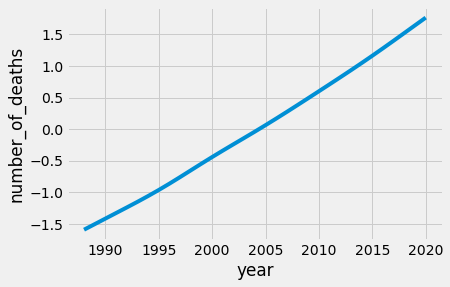

In [185]:
plt.plot(df_scaled['number_of_deaths'])
plt.ylabel('number_of_deaths')
plt.xlabel('year')
x=['year']

In [186]:
X = df_scaled['annual_co2_emissions_tons'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis")
    print("Reject the null hypothesis")
    print("Data has no unit root and is stationary")
else:
    print("Weak evidence against the null hypothesis")
    print("Fail to reject the null hypothesis")
    print("Data has a unit root and is non-stationary") 

ADF Statistic: -5.013632
p-value: 0.000021
Critical Values:
	1%: -3.654
	5%: -2.957
	10%: -2.618
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [187]:
X = df_scaled['population_population_total'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis")
    print("Reject the null hypothesis")
    print("Data has no unit root and is stationary")
else:
    print("Weak evidence against the null hypothesis")
    print("Fail to reject the null hypothesis")
    print("Data has a unit root and is non-stationary") 

ADF Statistic: 3.436316
p-value: 1.000000
Critical Values:
	1%: -3.753
	5%: -2.998
	10%: -2.639
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


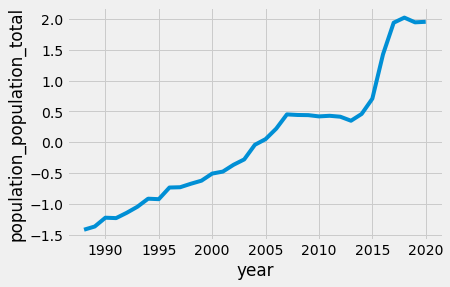

In [188]:
plt.plot(df_scaled['population_population_total'])
plt.ylabel('population_population_total')
plt.xlabel('year')
x=['year']

#### Cointegration Test:
Cointegration test helps to establish the presence of a statistically significant connection between two or more time series.

When two or more time series are cointegrated, it means they have a long run, statistically significant relationship.

In [189]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df_scaled, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df_scaled,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df_scaled.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df_scaled)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
population_population_total ::  132.99    > 111.7797  =>   True
annual_co2_emissions_tons ::  68.8      > 83.9383   =>   False
temperature_change_temp_change_celsius ::  40.75     > 60.0627   =>   False
total_count_disasters ::  17.19     > 40.1749   =>   False
people_affected_per_100k ::  9.64      > 24.2761   =>   False
number_of_deaths ::  3.75      > 12.3212   =>   False
economic_damages_as_a_share_of_gdp ::  0.0       > 4.1296    =>   False


Seleccion del nivel optimo de rez


In [190]:
test_obs = 2
train = df_scaled[:-test_obs]
test = df_scaled[-test_obs:]

In [191]:
nobs = 4
train, test = df_scaled[0:-nobs], df_scaled[-nobs:]

# Check size
print(train.shape)  
print(test.shape)  

(29, 7)
(4, 7)


### Select the Order (P) of VAR model

In [192]:
# Import Statsmodels
model = VAR(df_scaled)
for i in [1,2]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -16.621547897687883
BIC :  -14.056510067788361
FPE :  6.520246699871946e-08
HQIC:  -15.771310426204357 

Lag Order = 2
AIC :  -18.26068867002347
BIC :  -13.403635235477006
FPE :  2.177477823456668e-08
HQIC:  -16.677410359313672 



C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [193]:
x = model.select_order(maxlags=2)
x.summary()

,AIC,BIC,FPE,HQIC
0,-4.623,-4.299,0.009825,-4.517
1,-16.49,-13.90*,7.484e-08,-15.65
2,-18.26*,-13.40,2.177e-08*,-16.68*


El mejor modelo VAR se selecciona de acuerdo al criterio Akaike: el nivel en donde el valor es mas negativo.

#### Train the VAR Model of Selected Order(p)

In [194]:
model_fitted = model.fit(2)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 03, Sep, 2022
Time:                     23:54:17
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                   -13.4036
Nobs:                     31.0000    HQIC:                  -16.6774
Log likelihood:           80.1310    FPE:                2.17748e-08
AIC:                     -18.2607    Det(Omega_mle):     1.37461e-09
--------------------------------------------------------------------
Results for equation population_population_total
                                               coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------------------
const                                             0.528700         0.539699            0.980           0.327
L1.population_population_total     

El valor de este estadístico puede variar entre 0 y 4. Cuanto más se acerca al valor 2, entonces no existe una correlación serial significativa. Cuanto más cerca de 0, hay una correlación serial positiva, y cuanto más cerca de 4 implica una correlación serial negativa.

In [195]:
from statsmodels.stats.stattools import durbin_watson

out = durbin_watson(model_fitted.resid)

for col, val in zip(df_scaled.columns, out):
    print((col), ':', round(val, 2))

population_population_total : 2.51
annual_co2_emissions_tons : 2.25
temperature_change_temp_change_celsius : 2.9
total_count_disasters : 2.5
people_affected_per_100k : 2.19
number_of_deaths : 0.93
economic_damages_as_a_share_of_gdp : 1.98


La correlación serial parece bastante bien.

In [196]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  

# Input data for forecasting
forecast_input = train.values[-lag_order:]
forecast_input

2


array([[ 0.70690931, -0.42370181, -0.28481832,  2.28931231,  1.3441669 ,
         1.16264449,  0.04015281],
       [ 1.42492764, -0.42335573, -0.4854735 , -0.2093829 ,  1.76661936,
         1.28077395,  1.47731445]])

In [197]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df_scaled.index[-nobs:], columns=df_scaled.columns + '_fitted')
df_forecast

,population_population_total_fitted,annual_co2_emissions_tons_fitted,temperature_change_temp_change_celsius_fitted,total_count_disasters_fitted,people_affected_per_100k_fitted,number_of_deaths_fitted,economic_damages_as_a_share_of_gdp_fitted
year,,,,,,,
2017,1.830546,-0.847463,-0.451934,-0.886240,0.039049,1.401747,1.269790
2018,1.933703,-0.451537,-0.740187,-0.346354,0.896280,1.523627,1.270056
2019,1.939168,0.474359,0.194072,0.089831,1.236149,1.645932,0.783402
2020,1.871503,0.544571,0.275497,0.095963,0.628507,1.769566,0.650315


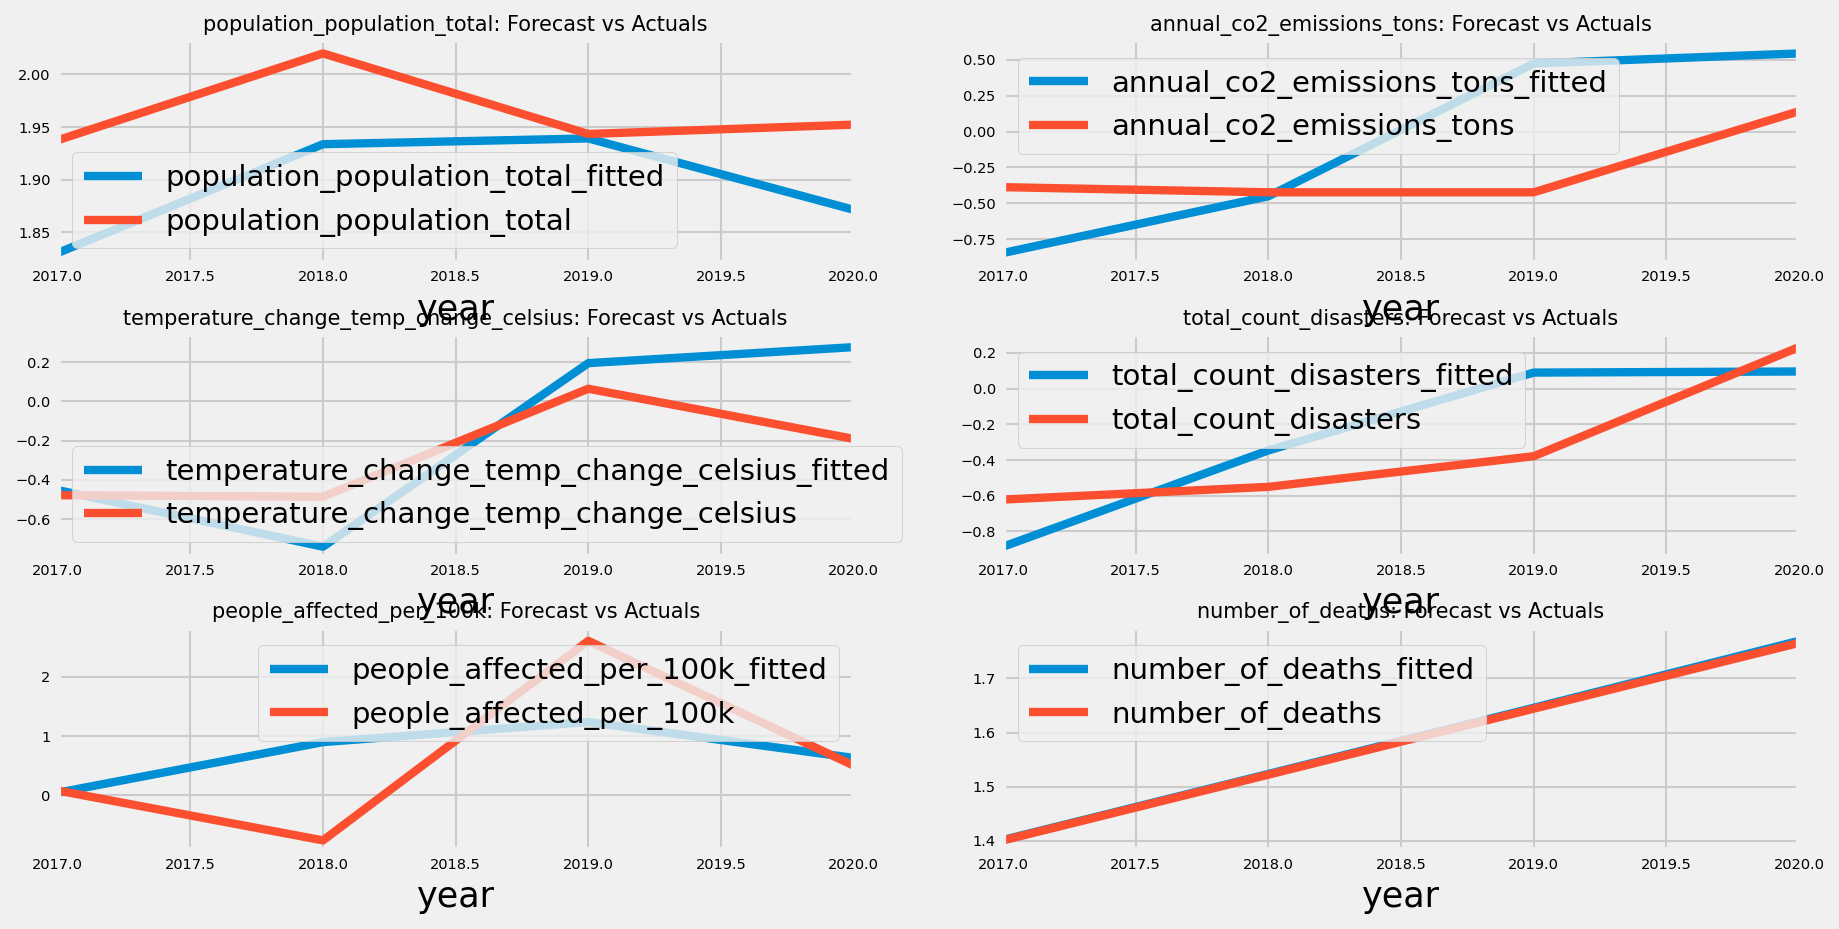

In [198]:
fig, axes = plt.subplots(nrows=int(len(df_scaled.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df_scaled.columns, axes.flatten())):
    df_forecast[col+'_fitted'].plot(legend=True, ax=ax, fontsize=6).autoscale(axis='x',tight=True)
    test[col][-nobs:].plot(legend=True, fontsize=6, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals", fontsize=10)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=7)

plt.tight_layout();
plt.gcf().set_size_inches(15, 6)

In [199]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: population_population_total')
accuracy_prod = forecast_accuracy(df_forecast['population_population_total_fitted'].values, test['population_population_total'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('nForecast Accuracy of: annual_co2_emissions_tons')
accuracy_prod = forecast_accuracy(df_forecast['annual_co2_emissions_tons_fitted'].values, test['annual_co2_emissions_tons'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('nForecast Accuracy of: temperature_change_temp_change_celsius')
accuracy_prod = forecast_accuracy(df_forecast['temperature_change_temp_change_celsius_fitted'].values, test['temperature_change_temp_change_celsius'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('nForecast Accuracy of: total_count_disasters')
accuracy_prod = forecast_accuracy(df_forecast['total_count_disasters_fitted'].values, test['total_count_disasters'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('nForecast Accuracy of: people_affected_per_100k')
accuracy_prod = forecast_accuracy(df_forecast['people_affected_per_100k_fitted'].values, test['people_affected_per_100k'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('nForecast Accuracy of: number_of_deaths')
accuracy_prod = forecast_accuracy(df_forecast['number_of_deaths_fitted'].values, test['number_of_deaths'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))
    
print('nForecast Accuracy of: economic_damages_as_share_of_gdp')
accuracy_prod = forecast_accuracy(df_forecast['economic_damages_as_a_share_of_gdp_fitted'].values, test['economic_damages_as_a_share_of_gdp'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

Forecast Accuracy of: population_population_total
mape :  0.0353
me :  -0.0695
mae :  0.0695
mpe :  -0.0353
rmse :  0.0796
corr :  0.5411
minmax :  0.0353
nForecast Accuracy of: annual_co2_emissions_tons
mape :  1.5542
me :  0.2037
mae :  0.4471
mpe :  0.4949
rmse :  0.5435
corr :  0.5577
minmax :  0.3466
nForecast Accuracy of: temperature_change_temp_change_celsius
mape :  1.2656
me :  0.0923
mae :  0.2194
mpe :  0.018
rmse :  0.274
corr :  0.866
minmax :  0.446
nForecast Accuracy of: total_count_disasters
mape :  0.6551
me :  0.0681
mae :  0.2685
mpe :  -0.4427
rmse :  0.2958
corr :  0.7103
minmax :  1.1979
nForecast Accuracy of: people_affected_per_100k
mape :  0.861
me :  0.0951
mae :  0.8017
mpe :  -0.7316
rmse :  1.0817
corr :  0.5329
minmax :  0.7702
nForecast Accuracy of: number_of_deaths
mape :  0.0012
me :  0.0019
mae :  0.0019
mpe :  0.0012
rmse :  0.0022
corr :  1.0
minmax :  0.0012
nForecast Accuracy of: economic_damages_as_share_of_gdp
mape :  1.8036
me :  0.1832
mae :  0

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
